<h1 style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>Student Performance Prediction</b>
</h1>

<div style="text-align: center; margin: 30px 0;">
    <img src="https://i0.wp.com/31.media.tumblr.com/1b85e82aeba3eb86c29a05fbbf8efe43/tumblr_inline_ndi8l2AH7w1rzbao2.gif" 
         alt="Student Performance Analysis" 
         style="width: 95%; max-height: 500px; object-fit: cover; border-radius: 20px; box-shadow: 0 10px 20px 0 rgba(46, 134, 193, 0.3); border: 2px solid #2E86C1;">
    <p style="font-size: 11px; color: gray; margin-top: 10px; font-family: sans-serif; font-style: italic;">
        "Analysis in Progress..."
    </p>
</div>

<h2 style="color:#2E86C1; font-family:sans-serif;">Table of Contents</h2>

<div style="background-color:#f0f8ff; padding: 20px; border-radius: 10px; border-left: 5px solid #2E86C1;">
    <ol style="font-family: sans-serif; font-size: 16px; line-height: 1.8;">
        <li><a href="#sec1" style="text-decoration: none; color: #2E86C1; font-weight: bold;">Introduction and Project Overview</a></li>
        <li><a href="#sec2" style="text-decoration: none; color: #2E86C1; font-weight: bold;">Data Loading and Initial Inspection</a></li>
        <li><a href="#sec3" style="text-decoration: none; color: #2E86C1; font-weight: bold;">Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#sec4" style="text-decoration: none; color: #2E86C1; font-weight: bold;">Data Preprocessing and Feature Engineering</a></li>
        <li><a href="#sec5" style="text-decoration: none; color: #2E86C1; font-weight: bold;">Model Development and Evaluation</a></li>
        <li><a href="#sec6" style="text-decoration: none; color: #2E86C1; font-weight: bold;">Conclusion and Key Findings</a></li>
    </ol>
</div>

<h1 id="sec1" style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>1. Introduction and Project Overview</b>
</h1>


Education is often viewed as the great equalizer, but academic success is rarely the result of a single factor. While common wisdom suggests that studying longer hours guarantees better grades, the reality is often more complex. Student performance is influenced by a multifaceted web of variables, including socioeconomic status, parental involvement, sleep habits, and peer influence.

In this project, conducted as part of the Elevvo Data Science Internship, we aim to move beyond intuition and use statistical evidence to understand what truly drives student success. By analyzing the Student Performance Factors dataset, we will attempt to decouple the impact of individual variables and build a predictive model that can estimate exam scores based on a holistic view of the student profile.

The analysis follows a structured pipeline. We begin by cleaning the data to ensure integrity, followed by an exploratory phase to visualize distributions and correlations. Finally, we implement and compare multiple regression algorithms to identify the most accurate model for predicting student performance.

<h1 id="sec2" style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>2. Data Loading and Initial Inspection</b>
</h1>

<h2 style="color:#2E86C1; font-family:sans-serif;">2.1 Importing Libraries</h2>

To facilitate our analysis, we utilize a standard stack of Python data science libraries. Pandas and NumPy serve as the foundation for data manipulation and numerical computation, while Matplotlib and Seaborn are employed for data visualization. We also import specific modules from Scikit-Learn for preprocessing, modeling, and evaluation. Warning filters are applied to maintain a clean output during the execution.

In [23]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import joblib

<h2 style="color:#2E86C1; font-family:sans-serif;">2.2 Data Loading and Preview</h2>

The dataset is loaded into a Pandas DataFrame for inspection. We examine the dimensions of the dataset to understand the sample size and feature space. Previewing the first and last few rows allows us to verify that the data has been read correctly and gives us an initial glimpse into the values and formatting of the columns.

In [24]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

print(f'Shape of Dataset: {df.shape}')
print('-' * 30 + '\nDataset Preview (First 5 Rows):\n')
display(df.head())
print('-' * 30 + '\nDataset Preview (Last 5 Rows):\n')
display(df.tail())

Shape of Dataset: (6607, 20)
------------------------------
Dataset Preview (First 5 Rows):



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


------------------------------
Dataset Preview (Last 5 Rows):



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


<h2 style="color:#2E86C1; font-family:sans-serif;">2.3 Data Integrity and Statistical Summary</h2>

Before proceeding to analysis, we must ensure data quality. We check for missing values and duplicates. To maintain a robust dataset for this specific analysis, we remove rows with missing data. Following this, we generate a statistical summary for both numerical and categorical variables to understand the central tendency, dispersion, and distribution of the data points.

In [25]:
print("Missing Values in Data:", df.isnull().sum().sum())
print("Duplicated Values in Data:", df.duplicated().sum().sum())

Missing Values in Data: 235
Duplicated Values in Data: 0


In [26]:
# Identify specific columns with nulls
nulls = df.isnull().sum()
display(nulls[nulls > 0].to_frame(name='Nulls').rename_axis('Columns'))

,Nulls
Columns,
Teacher_Quality,78
Parental_Education_Level,90
Distance_from_Home,67


There are missing values in the dataset, accounting for 299 rows, which represents approximately 3.47% of the total data.
Therefore, we will proceed by removing the rows that contain missing values before continuing the analysis.

In [27]:
# Handling missing values
df.dropna(inplace=True)

In [28]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [29]:
# Statistical Summary
print("Numerical Statistics:")
display(df.describe().T)

print("\nCategorical Statistics:")
display(df.describe(include='object').T)

Numerical Statistics:


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.985460,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0



Categorical Statistics:


,count,unique,top,freq
Parental_Involvement,6378,3,Medium,3251
Access_to_Resources,6378,3,Medium,3204
Extracurricular_Activities,6378,2,Yes,3807
Motivation_Level,6378,3,Medium,3237
Internet_Access,6378,2,Yes,5893
Family_Income,6378,3,Low,2582
Teacher_Quality,6378,3,Medium,3826
School_Type,6378,2,Public,4434
Peer_Influence,6378,3,Positive,2553
Learning_Disabilities,6378,2,No,5710


<h1 id="sec3" style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>3. Exploratory Data Analysis (EDA)</b>
</h1>

<h2 style="color:#2E86C1; font-family:sans-serif;">3.1 Analyzing the Target Variable: Exam Scores</h2>

Our primary objective is to predict `Exam_Score`. Therefore, we begin by analyzing its distribution. We utilize a dual-plot approach: a histogram with a Kernel Density Estimate (KDE) to visualize the shape of the distribution, and a boxplot to identify outliers and quartiles. We also calculate key statistical metrics (Skewness, Kurtosis) and segment the students into performance tiers (Low, Mid, High) to understand the baseline class balance.

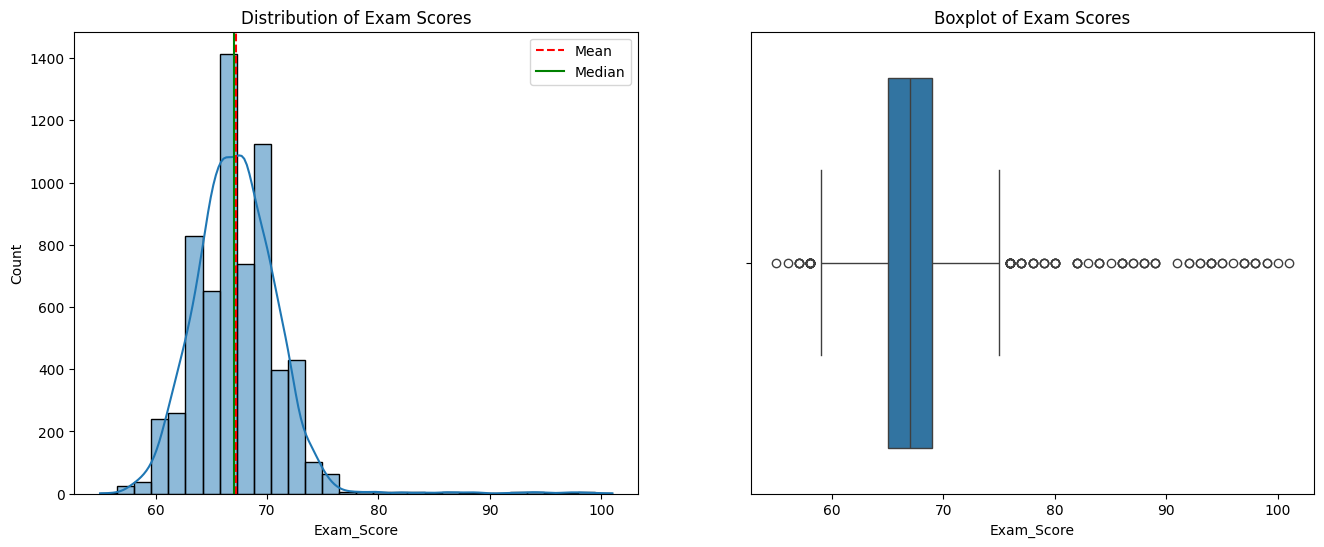

------------------------------
Exam Score Statistics:
------------------------------
Mean:     67.25
Median:   67.00
Skewness: 1.6658
Kurtosis: 10.6562
------------------------------


In [30]:
# Visualization of Target Variable
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with KDE
sns.histplot(df['Exam_Score'], kde=True, bins=30, ax=axes[0])
axes[0].axvline(df['Exam_Score'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['Exam_Score'].median(), color='green', linestyle='-', label='Median')
axes[0].set_title('Distribution of Exam Scores')
axes[0].legend()

# Boxplot
sns.boxplot(x=df['Exam_Score'], ax=axes[1])
axes[1].set_title('Boxplot of Exam Scores')

plt.show()

# Statistical Summary
print("-" * 30)
print("Exam Score Statistics:")
print("-" * 30)
print(f"Mean:     {df['Exam_Score'].mean():.2f}")
print(f"Median:   {df['Exam_Score'].median():.2f}")
print(f"Skewness: {df['Exam_Score'].skew():.4f}")
print(f"Kurtosis: {df['Exam_Score'].kurt():.4f}")
print("-" * 30)

In [31]:
# Segmentation Analysis
pct_low  = (df['Exam_Score'] <= 64).mean() * 100
pct_high = (df['Exam_Score'] >= 70).mean() * 100
pct_mid  = (df['Exam_Score'].between(65, 69)).mean() * 100

print("Score Segments Summary:")
print("-" * 30)
print(f"Low Scores  (<= 64):  {pct_low:.2f}%")
print(f"Mid Scores  (65-69):  {pct_mid:.2f}%")
print(f"High Scores (>= 70):  {pct_high:.2f}%")
print("-" * 30)

Score Segments Summary:
------------------------------
Low Scores  (<= 64):  21.89%
Mid Scores  (65-69):  53.32%
High Scores (>= 70):  24.79%
------------------------------


<h2 style="color:#2E86C1; font-family:sans-serif;">3.2 Numerical Features: Distribution & Correlation</h2>

Next, we examine the independent numerical variables (e.g., `Hours_Studied`, `Sleep_Hours`). We employ a loop to generate visualizations for each feature:
1.  **Distribution:** To see how the data is spread.
2.  **Scatter Plot:** To observe the direct relationship with `Exam_Score`.
We also distinguish data points by `Gender` to detect any immediate demographic patterns.

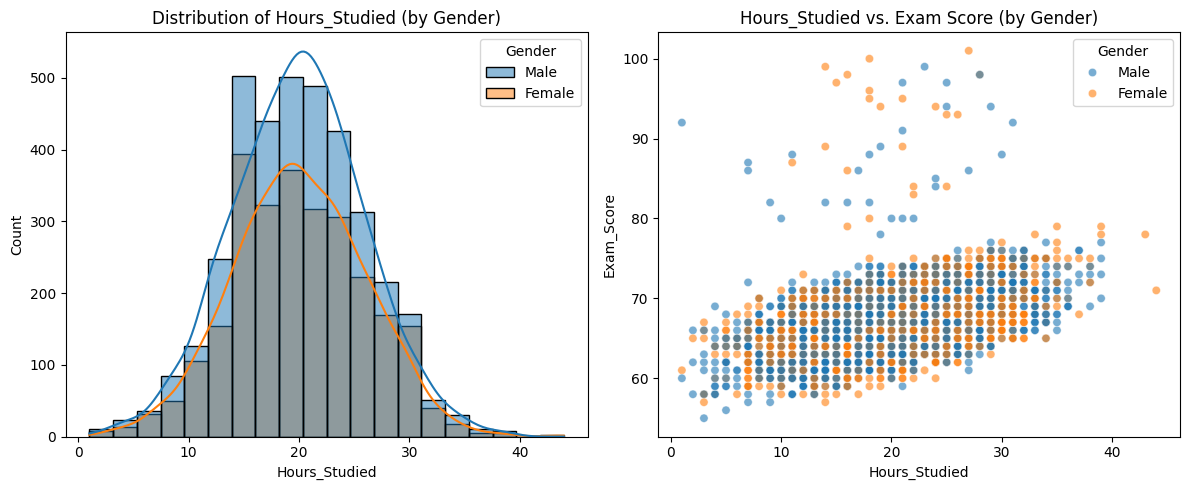

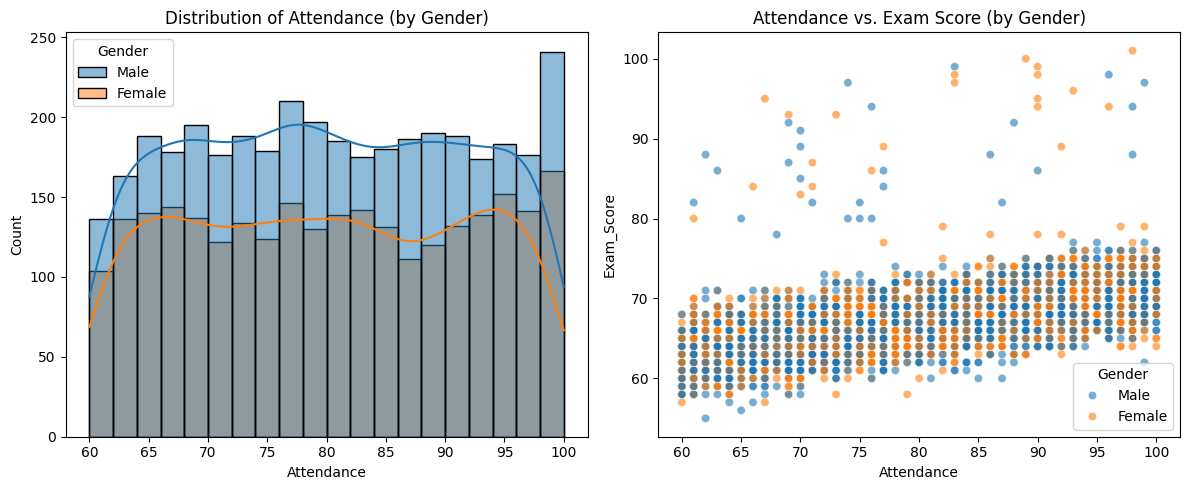

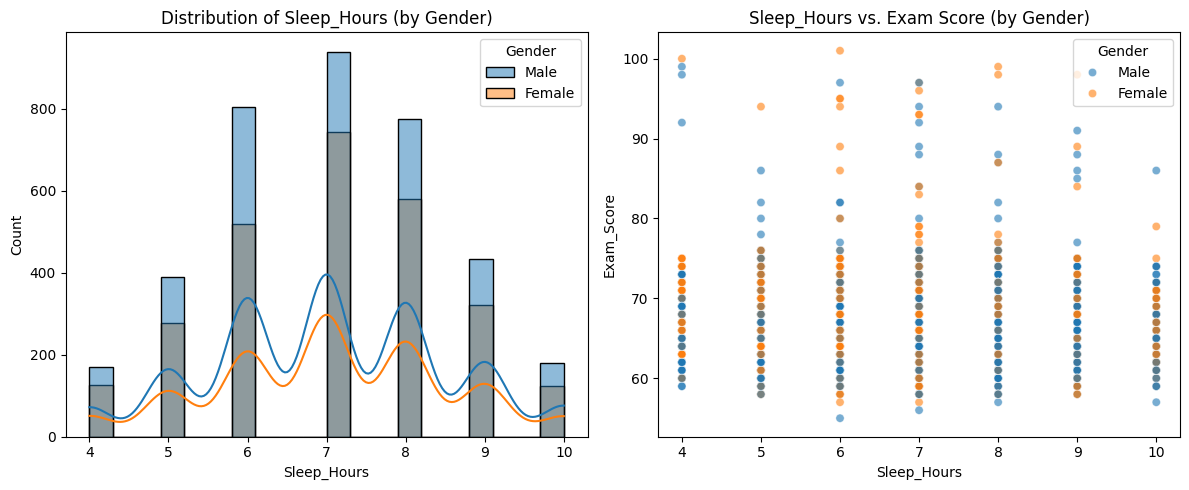

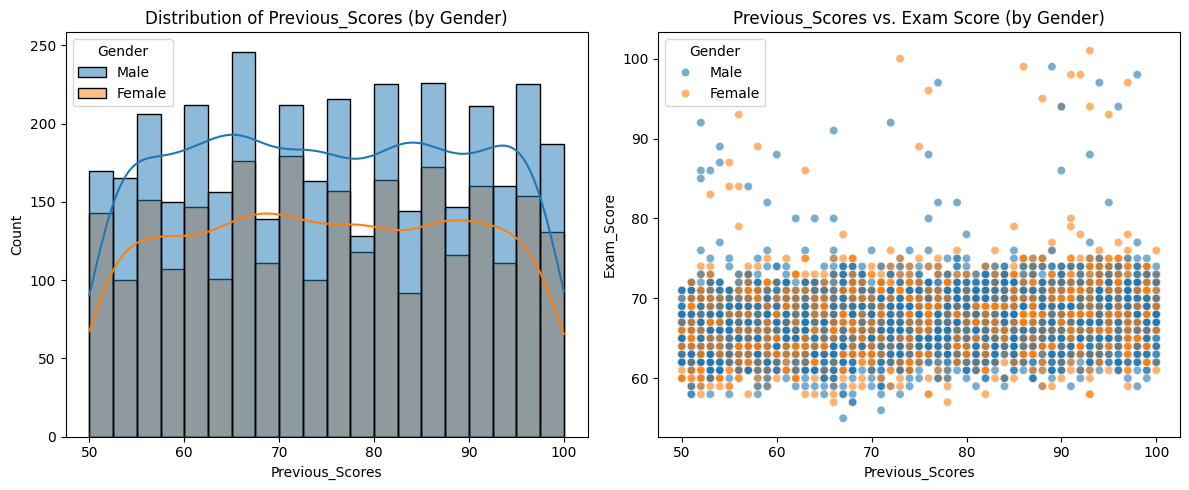

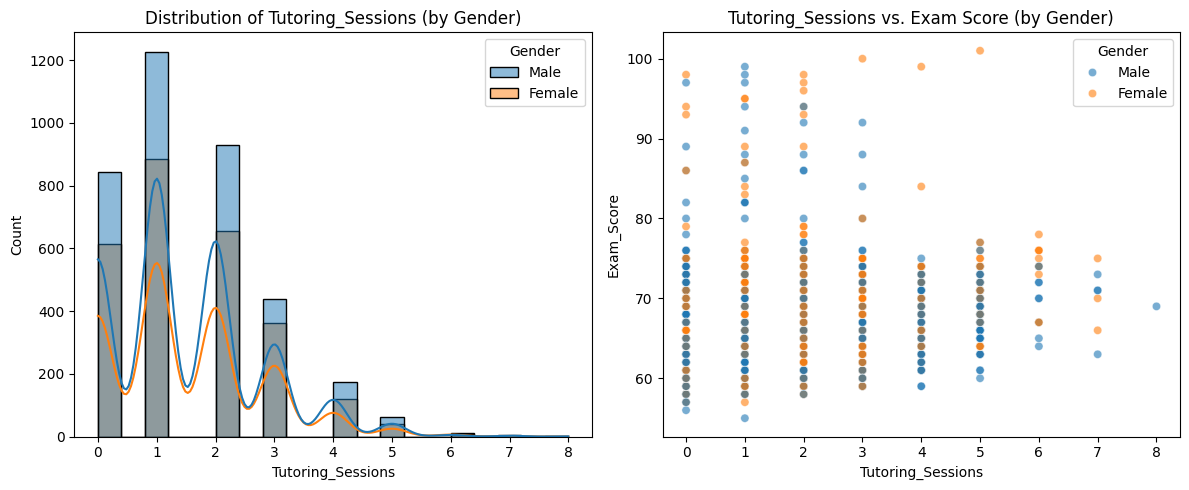

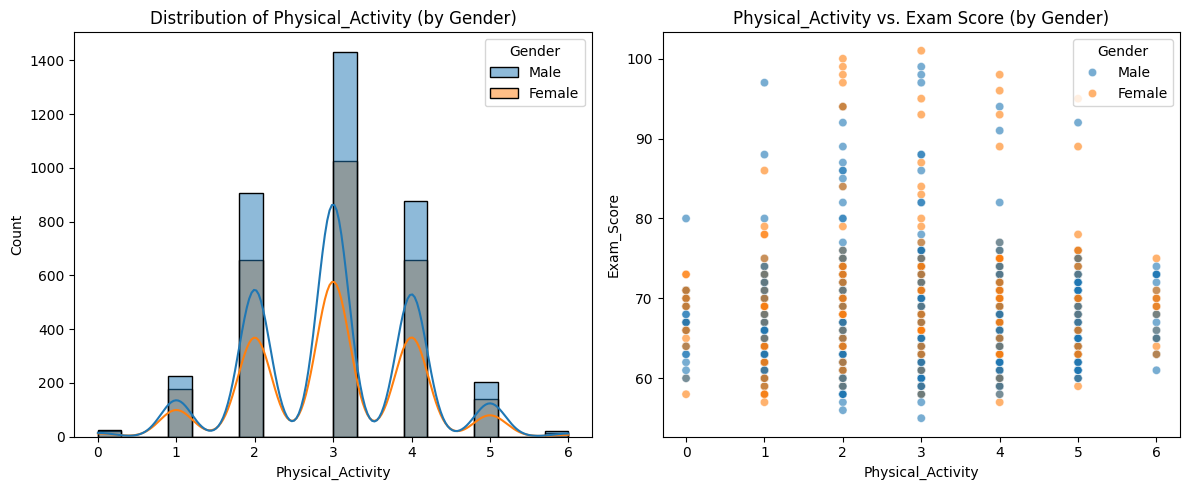

In [32]:
numerical_cols = df.select_dtypes(include=['number']).columns.drop('Exam_Score')

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Subplot 1: Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, hue='Gender', kde=True, bins=20, alpha=0.5)
    plt.title(f'Distribution of {col} (by Gender)')

    # Subplot 2: Relationship with Target
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x=col, y='Exam_Score', hue='Gender', alpha=0.6)
    plt.title(f'{col} vs. Exam Score (by Gender)')

    plt.tight_layout()
    plt.show()

<h2 style="color:#2E86C1; font-family:sans-serif;">3.3 Categorical Feature Analysis: Helper Functions</h2>

Given the significant number of categorical variables in the dataset (e.g., Parental Education, Access to Resources), we adopt a modular approach. We define two helper functions to streamline the visualization process:
1.  **`plot_categorical_counts`**: Visualizes the frequency distribution of each category.
2.  **`plot_categorical_impact`**: Uses boxplots to compare the distribution of `Exam_Score` across different categories, highlighting shifts in median performance and variance.

In [33]:
def plot_categorical_counts(df, col_list, palette='Blues'):
    """
    Plots count distribution for a list of categorical columns
    """
    n_cols = 2
    n_rows = math.ceil(len(col_list) / n_cols)

    plt.figure(figsize=(15, n_rows * 5))

    for i, col in enumerate(col_list):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.countplot(data=df, x=col, palette=palette)
        plt.title(f'Count of {col}', fontsize=12, fontweight='bold')
        plt.xticks(rotation=15)

    plt.tight_layout()
    plt.show()

def plot_categorical_impact(df, col_list, target_col, palette='Set2'):
    """
    Plots boxplots to show the impact of categorical columns on a target numerical column
    """
    n_cols = 2
    n_rows = math.ceil(len(col_list) / n_cols)

    plt.figure(figsize=(16, n_rows * 6))

    for i, col in enumerate(col_list):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x=col, y=target_col, palette=palette)
        plt.title(f'Impact of {col} on {target_col}', fontsize=12, fontweight='bold')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.xticks(rotation=15)

    plt.tight_layout()
    plt.show()

<h2 style="color:#2E86C1; font-family:sans-serif;">3.4 Distribution of Categorical Variables</h2>

We begin by examining the composition of our student cohort. This helps us identify any class imbalances, such as a disproportionate number of students from a specific socioeconomic background or school type, which could influence model training.

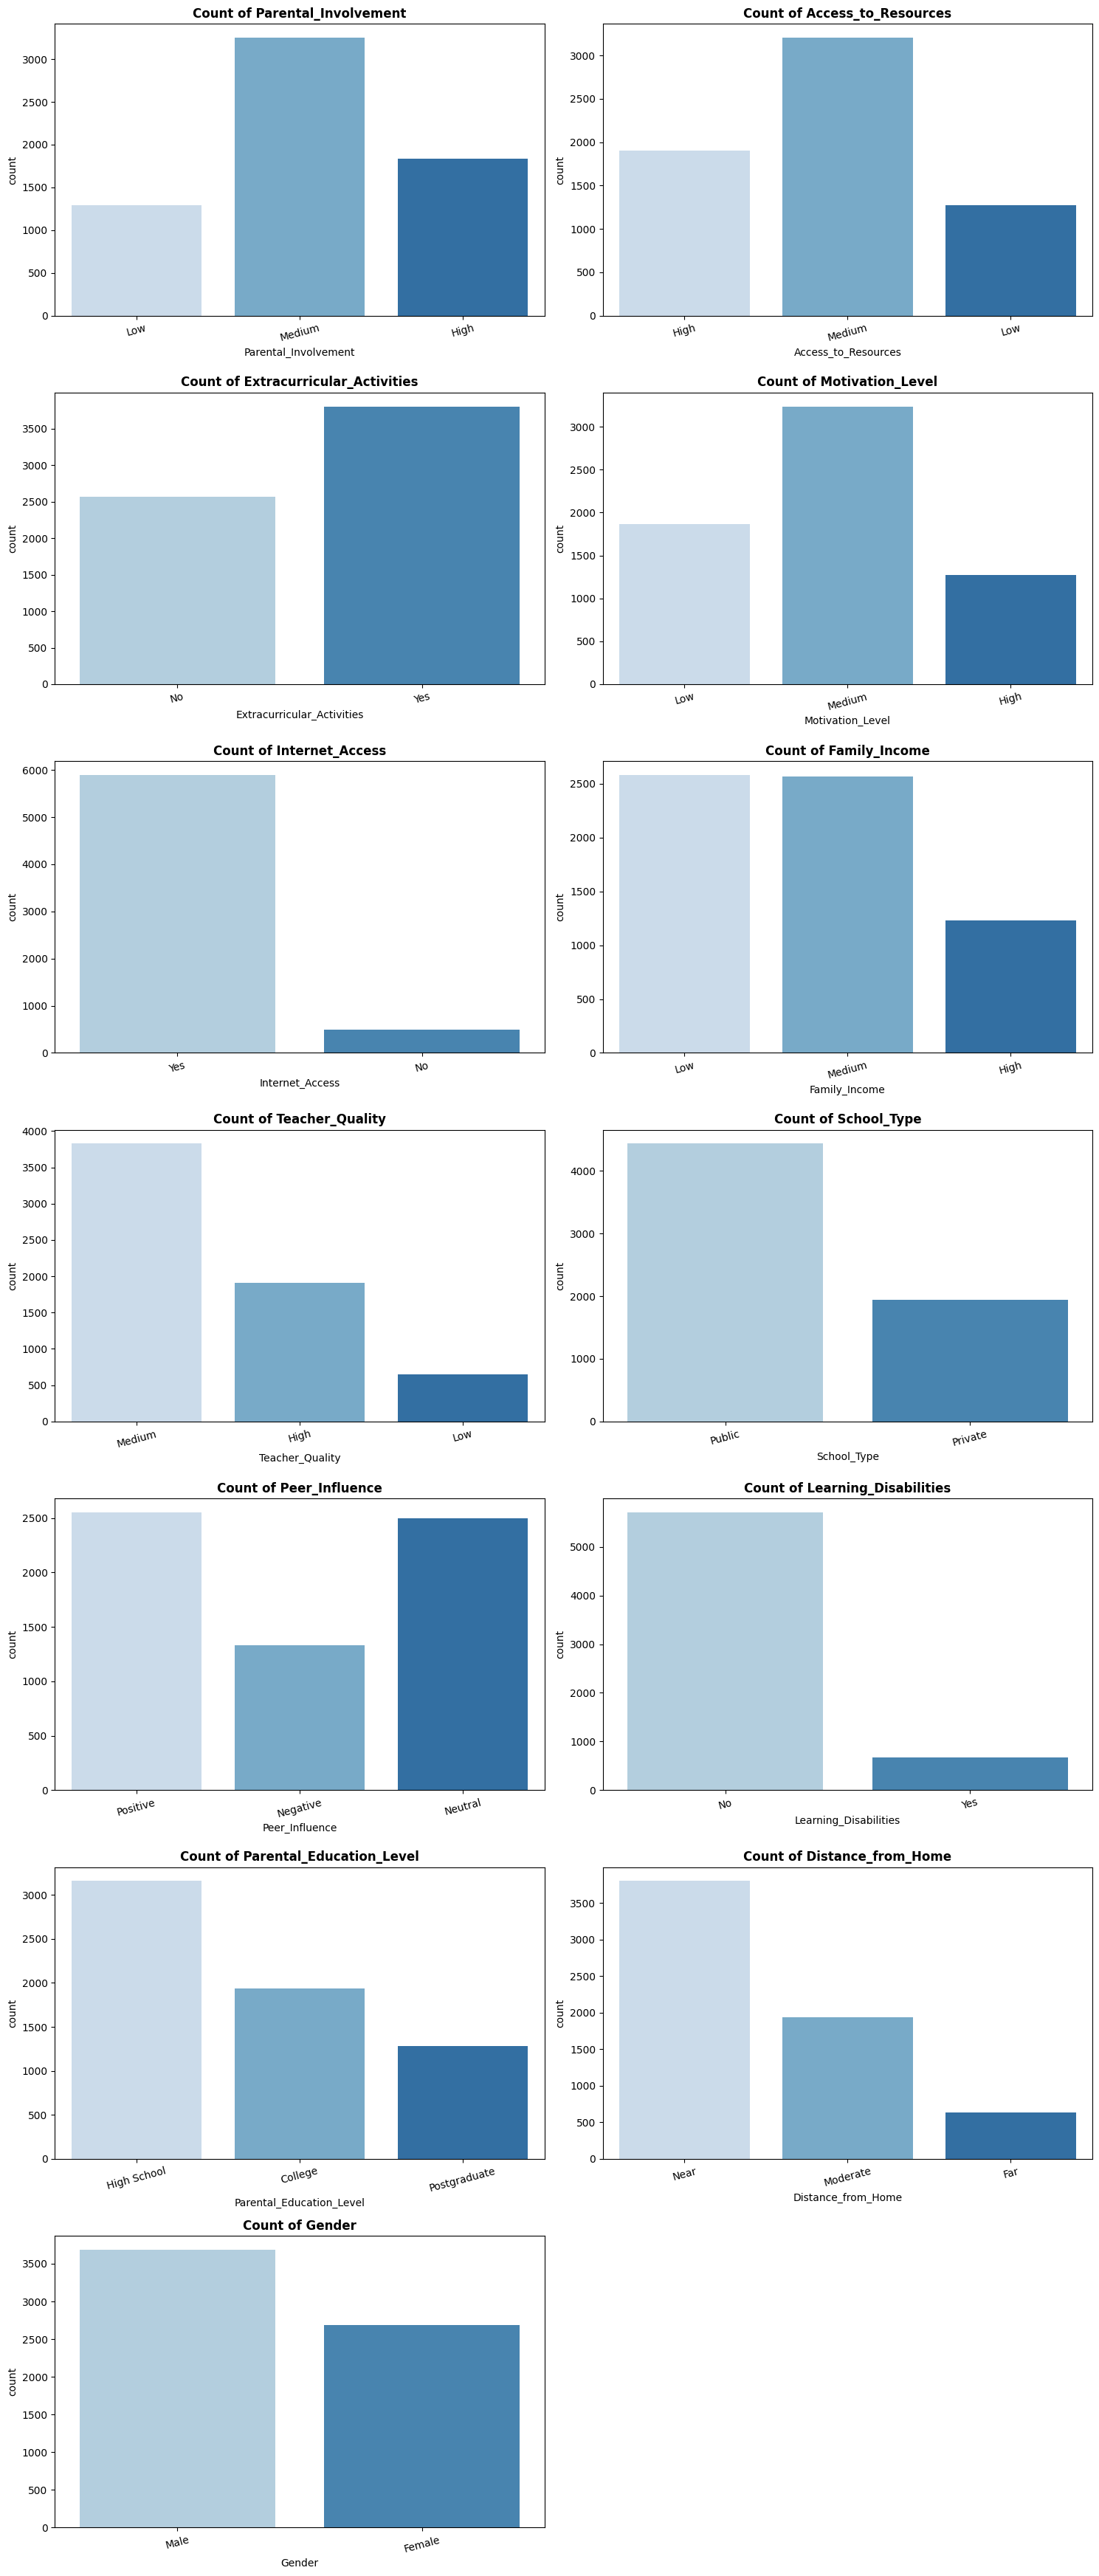

Key Demographics Observations:
-----------------------------------
Students from Low-Income Families:   40.48%
Students with Learning Disabilities: 10.47%
-----------------------------------
The dataset includes a significant representation of these groups,
which requires careful attention during modeling.


In [34]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Visualizing Counts
plot_categorical_counts(df, categorical_cols, palette='Blues')

# Key Demographic Statistics
low_income_pct = (df['Family_Income'] == 'Low').mean() * 100
disability_pct = (df['Learning_Disabilities'] == 'Yes').mean() * 100

print("Key Demographics Observations:")
print("-" * 35)
print(f"Students from Low-Income Families:   {low_income_pct:.2f}%")
print(f"Students with Learning Disabilities: {disability_pct:.2f}%")
print("-" * 35)
print("The dataset includes a significant representation of these groups,")
print("which requires careful attention during modeling.")

<h2 style="color:#2E86C1; font-family:sans-serif;">3.5 Impact of Categories on Performance</h2>

Here, we analyze how different categorical factors correlate with academic success. The boxplots below reveal whether certain groups (e.g., students with high parental involvement) consistently outperform others.

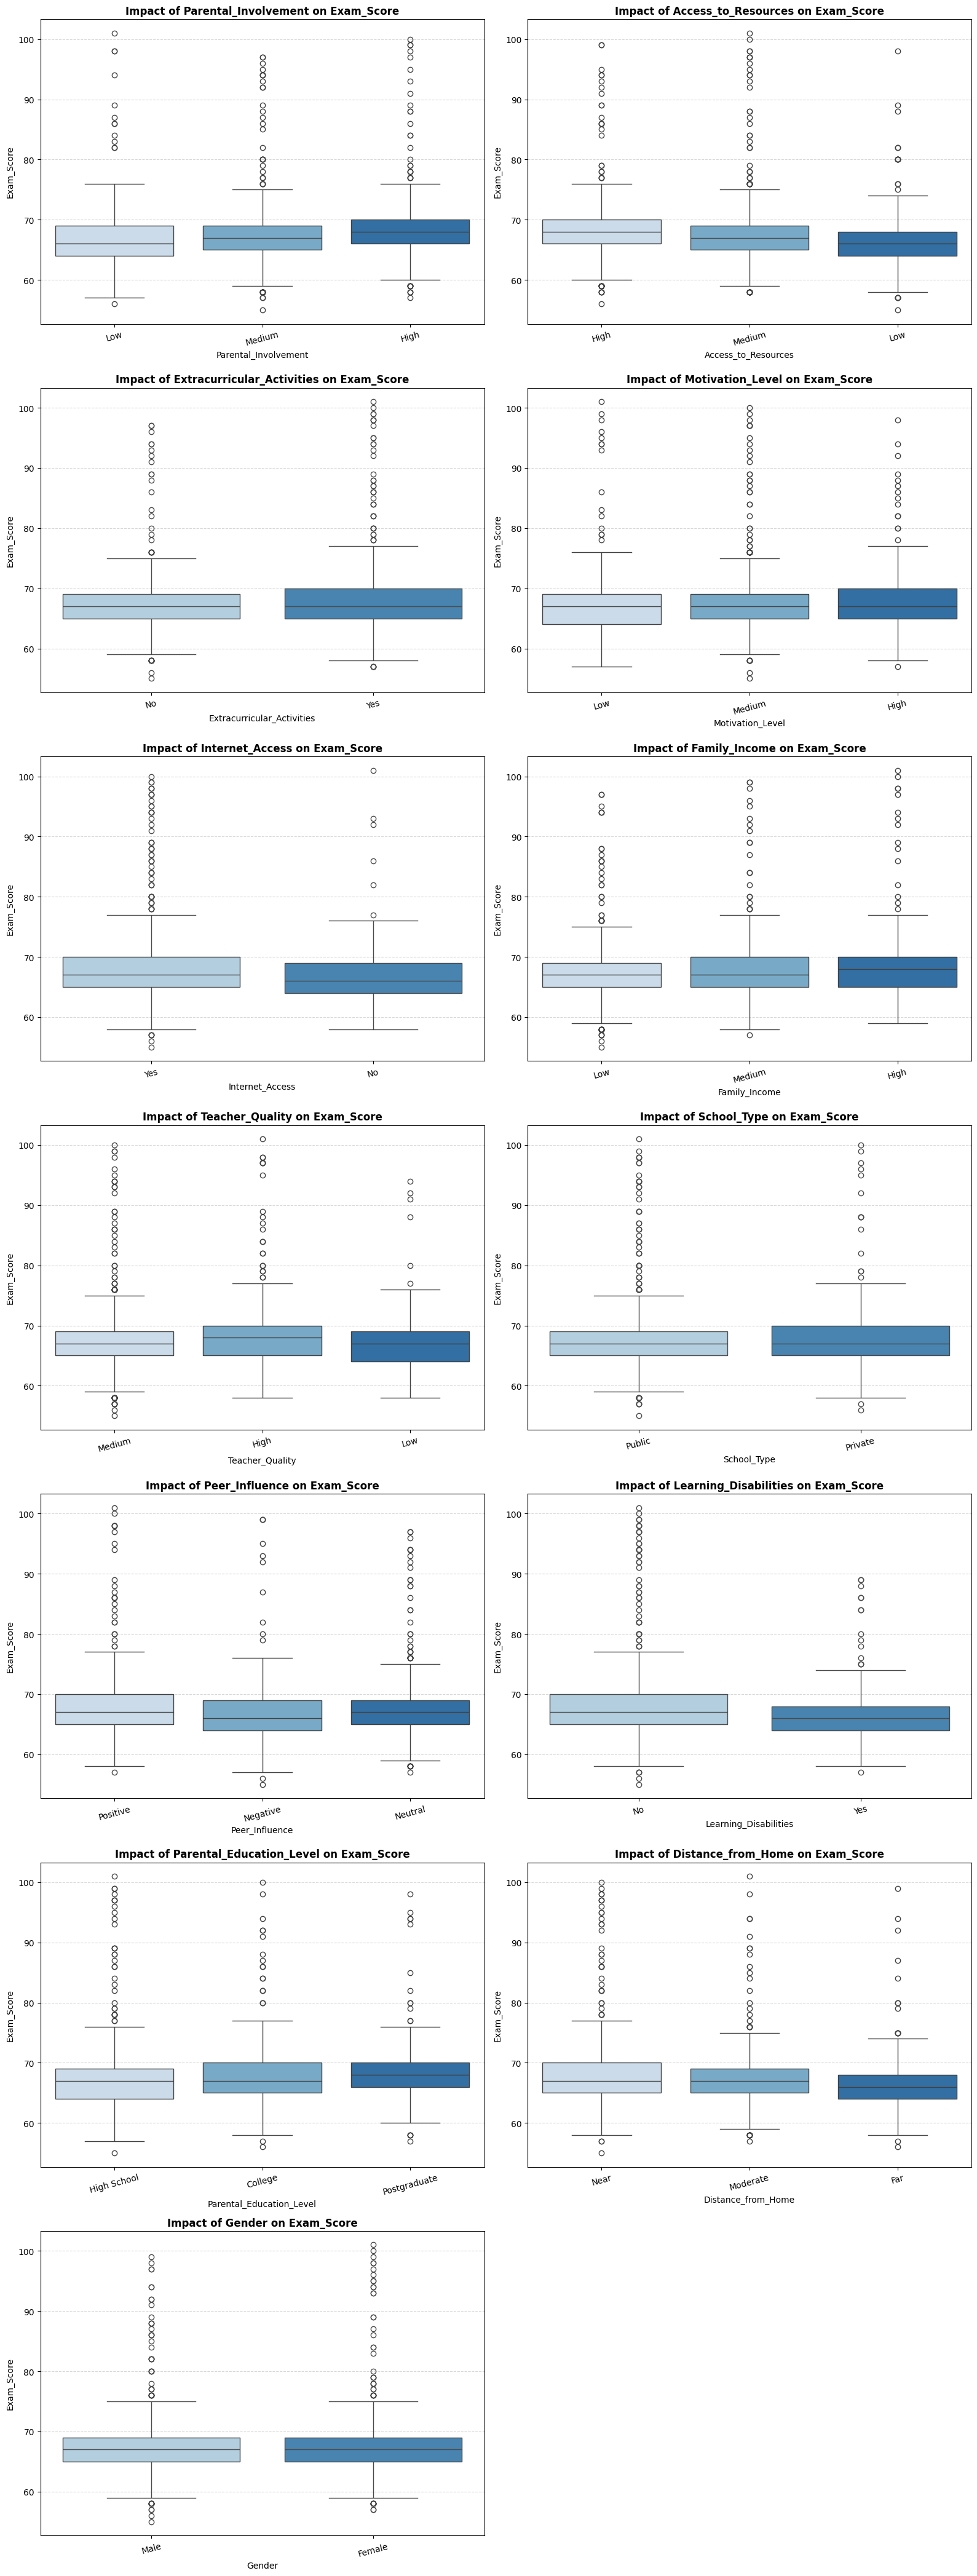

In [35]:
plot_categorical_impact(df, categorical_cols, target_col='Exam_Score', palette='Blues')

<h3 style="color:#2E86C1; font-family:sans-serif;">Insights from Categorical Analysis</h3>

Based on the box plot analysis, we can categorize the features based on their impact on student performance metrics (Median, Q1, and Q3).

#### 1. Key Drivers (Influencing the Median)
The following variables show a clear positive correlation with the median test score. As the quality or frequency of these factors improves, the typical student's score increases:
* **Parental Involvement & Education:** Higher involvement and post-graduate parental education levels align with higher scores.
* **Resources & Support:** Better **Access to Resources**, **Internet Access**, and frequent **Tutoring Sessions** are strong indicators of success.
* **Student Profile:** Absence of **Learning Disabilities** and closer **Distance from Home** also correlate with higher medians.

#### 2. Nuanced Influencers (Variance Impact)
Some variables may not significantly shift the median, but they heavily influence the range of scores (risk of failure vs. potential for excellence).

* **Family Income:**
    * There is **no significant difference in the median** between Low and Medium income groups.
    * However, **the 25th percentile (Q1) is notably lower for Low-income families**, suggesting that financial instability increases the risk of lower performance, even if the "average" student performs similarly to their peers.
    * High-income students show a slight uplift in the median.

* **Parental Education:**
    * The gap between High School and College-educated parents is minimal at the median level.
    * The significant performance jump is observed only when parents hold a **Postgraduate degree**.

#### 3. Low Impact Variables
Visual analysis indicates minimal variation in the median scores across categories for the following variables:
* *Lifestyle:* Sleep Hours, Physical Activity, Extracurricular Activities.
* *School Environment:* School Type, Teacher Quality.
* *Demographics:* Gender.

<h2 style="color:#2E86C1; font-family:sans-serif;">3.6 Segmentation Analysis: Who are the Top Performers?</h2>

To gain deeper insights, we segment students into three performance tiers: **Low (<64)**, **Mid (64-69)**, and **High (70+)**. By analyzing the composition of these groups across different variables (like Motivation or Parental Involvement), we can identify the defining characteristics of top-performing students versus those who are struggling.

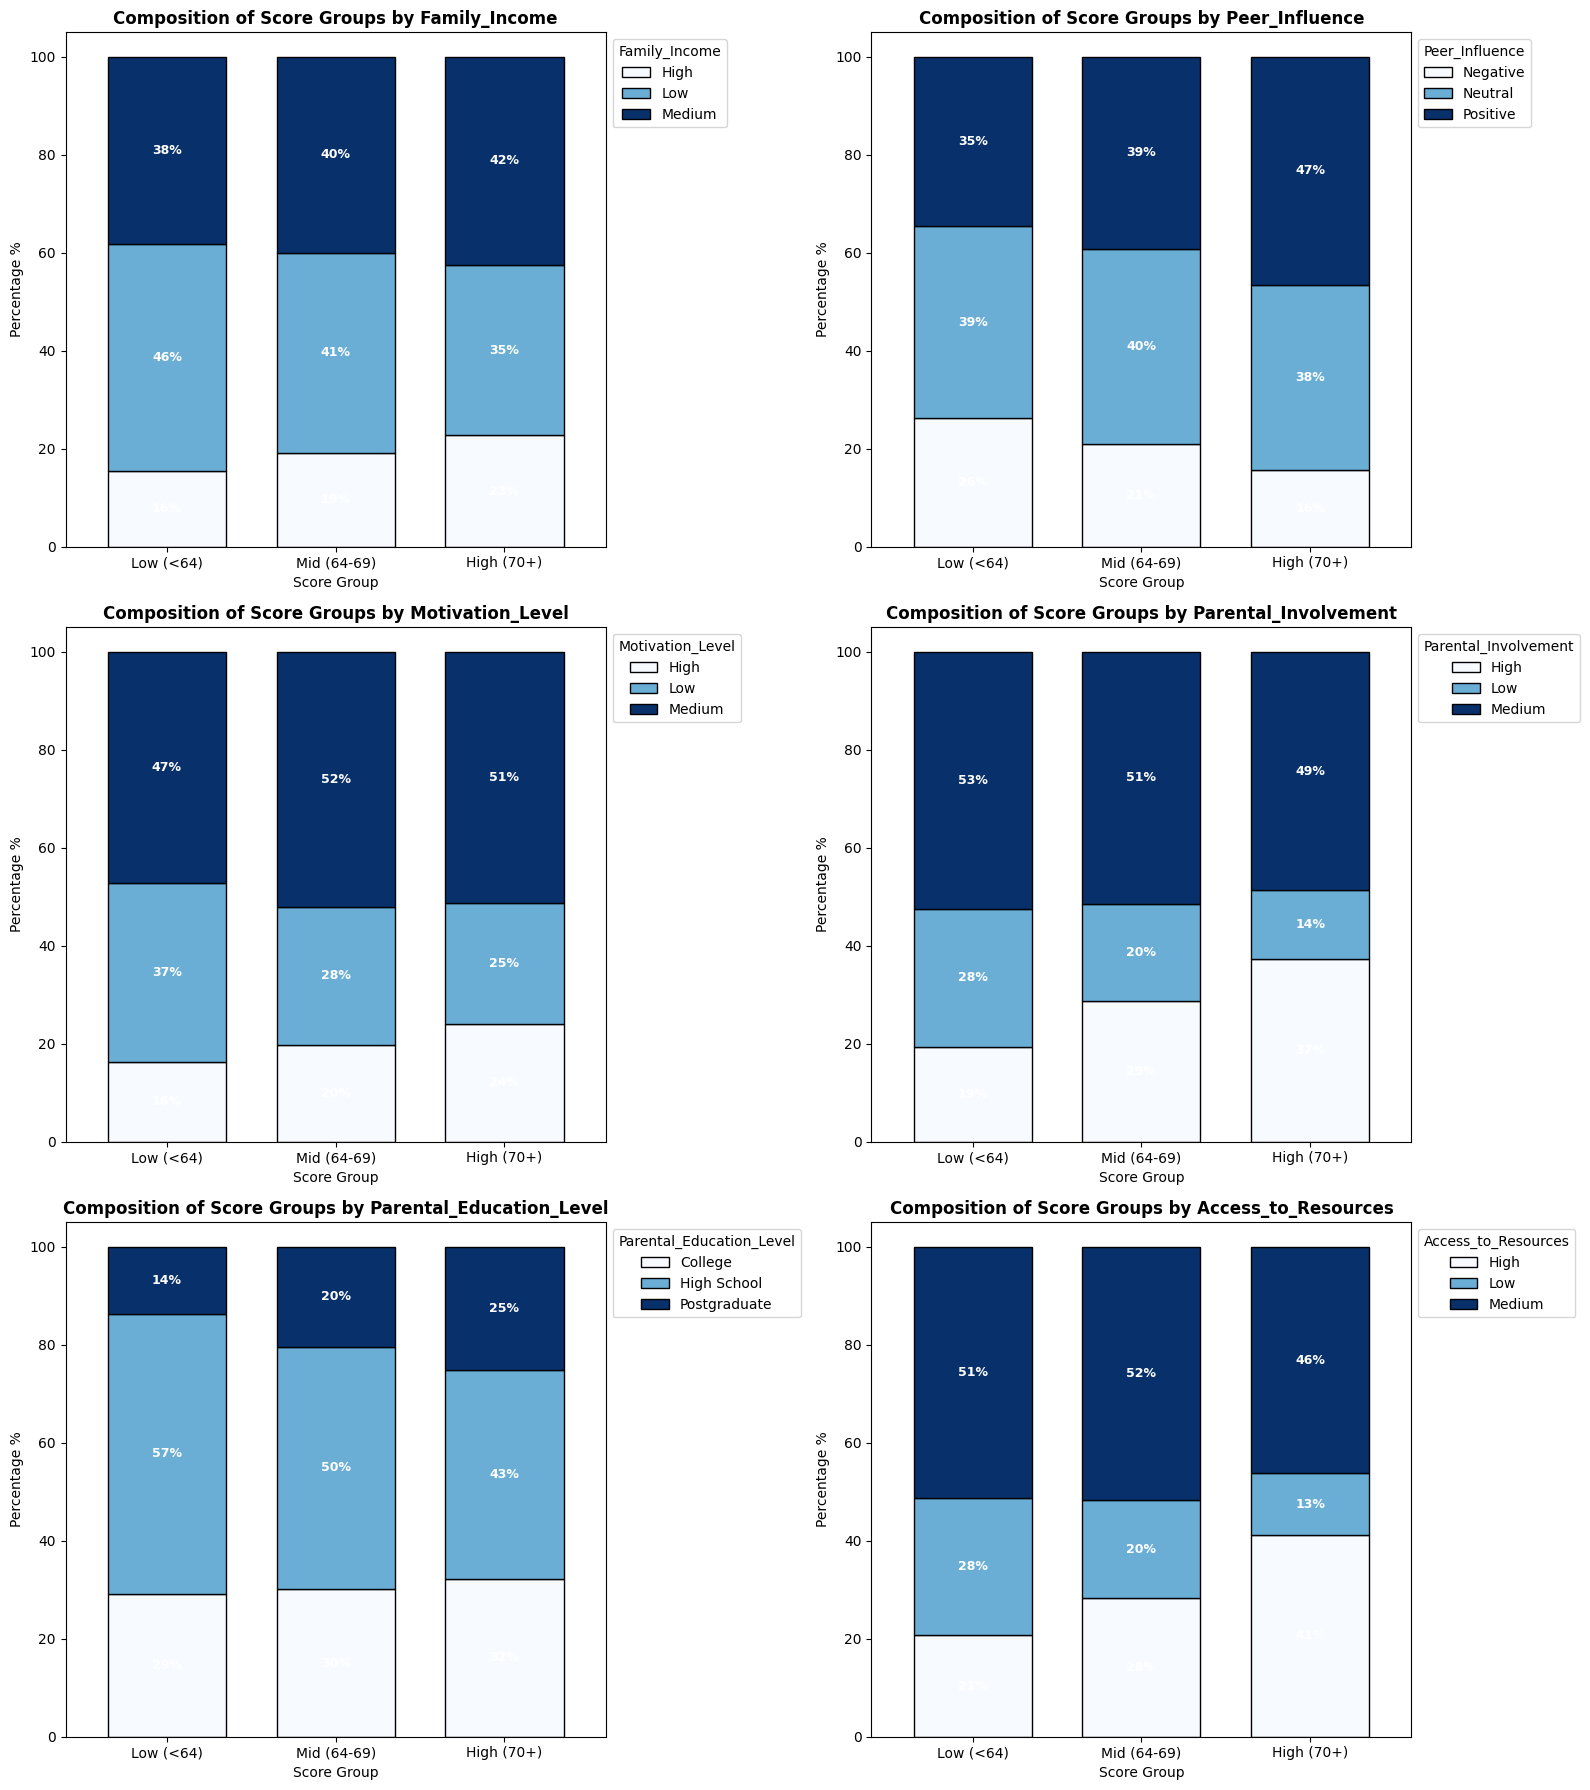

In [36]:
# Create Score Segments
df['Score_Segment'] = pd.cut(
    df['Exam_Score'],
    bins=[0, 64, 69, 100],
    labels=['Low (<64)', 'Mid (64-69)', 'High (70+)']
)

# Define columns to analyze against segments
cols_to_analyze = [
    'Family_Income',
    'Peer_Influence',
    'Motivation_Level',
    'Parental_Involvement',
    'Parental_Education_Level',
    'Access_to_Resources'
]

# Plotting Stacked Bar Charts
n_cols = 2
n_rows = math.ceil(len(cols_to_analyze) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(cols_to_analyze):
    # Calculate percentage distribution
    crosstab_data = pd.crosstab(df['Score_Segment'], df[col], normalize='index') * 100
    
    # Plot
    crosstab_data.plot(kind='bar', stacked=True, ax=axes[i], colormap='Blues', edgecolor='black', width=0.7)
    
    # Styling
    axes[i].set_title(f"Composition of Score Groups by {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Percentage %')
    axes[i].set_xlabel('Score Group')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(title=col, bbox_to_anchor=(1.0, 1.0), loc='upper left')

    # Add labels
    for c in axes[i].containers:
        axes[i].bar_label(c, fmt='%.0f%%', label_type='center', color='white', fontsize=9, weight='bold')

# Remove empty subplot if exists
if len(cols_to_analyze) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

<h2 style="color:#2E86C1; font-family:sans-serif;">3.7 Feature Correlation Analysis</h2>

Before modeling, we must quantify the relationships between variables. We perform the following steps:
1.  **Ordinal Encoding:** Manually mapping `Family_Income` to preserve its order (Low < Medium < High).
2.  **Label Encoding:** Converting remaining categorical variables into numeric format.
3.  **Correlation Matrix:** Visualizing the linear relationships between all features and the target `Exam_Score`.

This step highlights which features have the strongest predictive power (positive or negative) for the exam scores.

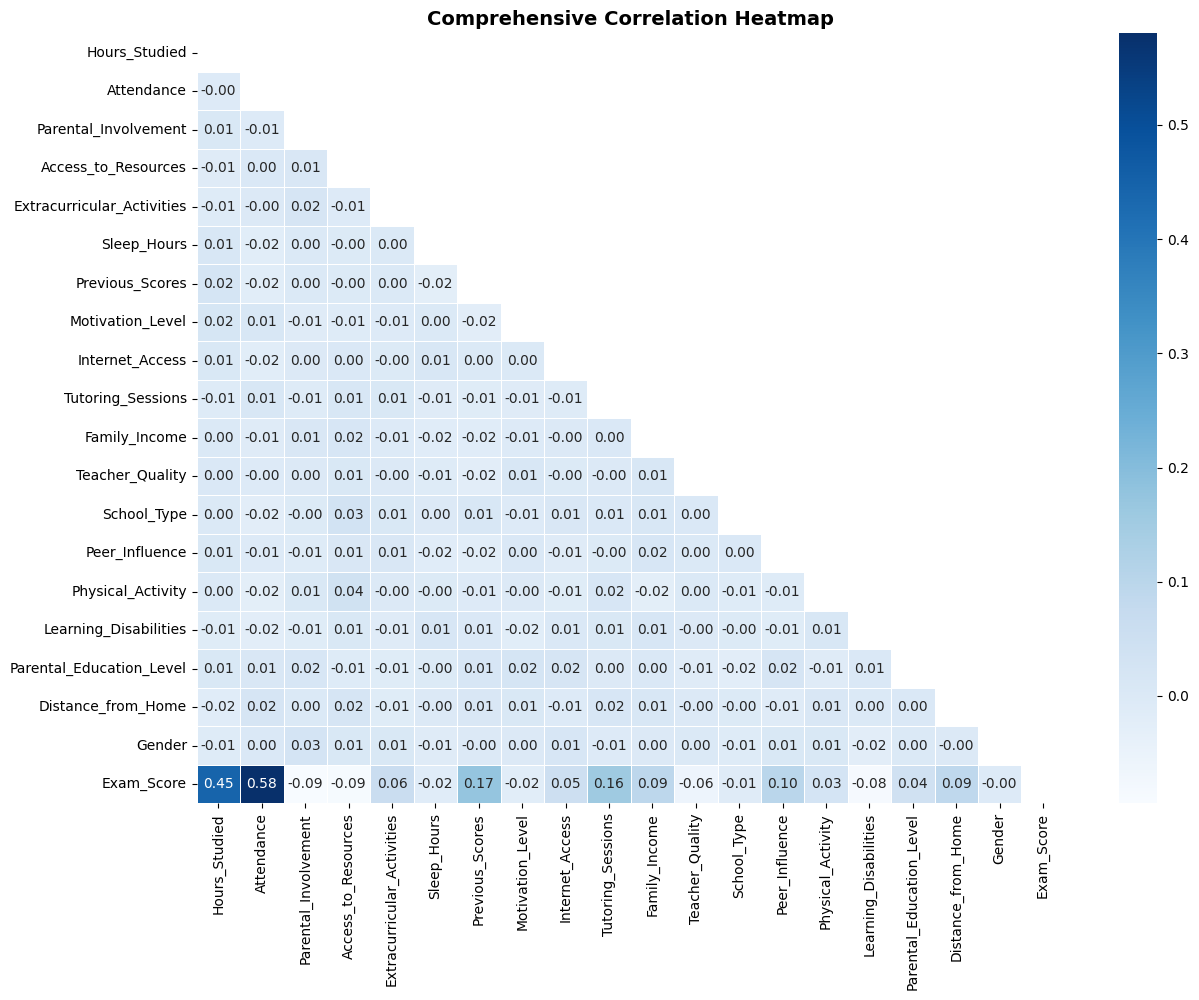

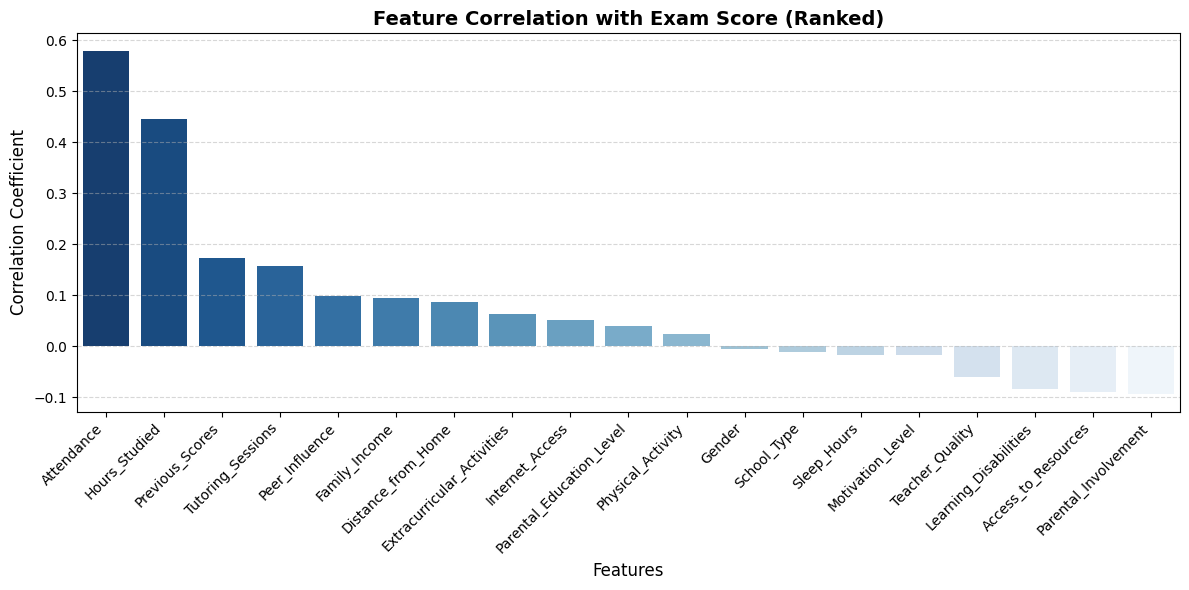

In [37]:
# 1. Manual Mapping for Ordinal Variable
income_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Family_Income'] = df['Family_Income'].map(income_map)

# Remove the temporary segment column
df.drop('Score_Segment', axis=1, inplace=True)

# 2. Label Encoding for remaining categorical variables
le = LabelEncoder()
cols_to_encode = df.select_dtypes(include=['object', 'category']).columns

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))

# 3. Correlation Matrix Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()

# Mask the upper triangle for cleaner view
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues', mask=mask, linewidths=0.5)
plt.title('Comprehensive Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

# 4. Ranked Correlation Barplot
target_corr = corr_matrix['Exam_Score'].drop('Exam_Score').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette='Blues_r')
plt.title('Feature Correlation with Exam Score (Ranked)', fontsize=14, fontweight='bold')
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1 id="sec4" style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>4. Data Preprocessing and Feature Engineering</b>
</h1>

<h2 style="color:#2E86C1; font-family:sans-serif;">4.1 Data Splitting</h2>

To ensure the validity of our model and prevent overfitting, we must separate our dataset into a training set and a testing set. The model will learn patterns from the training data, and its performance will be evaluated on the unseen testing data. We use an 80-20 split, retaining 20% of the data for final validation.

In [38]:
# Defining Features (X) and Target (y)
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Splitting the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training Data Shape: {X_train.shape}')
print(f'Testing Data Shape:  {X_test.shape}')
print(f"Percentage of Testing Data: {len(X_test)/(len(X_train)+len(X_test)):.2%}")

Training Data Shape: (5102, 19)
Testing Data Shape:  (1276, 19)
Percentage of Testing Data: 20.01%


<h2 style="color:#2E86C1; font-family:sans-serif;">4.2 Feature Scaling</h2>

Machine learning algorithms often perform better when numerical input variables are scaled to a standard range. This is particularly important for distance-based algorithms and linear regression. We apply two types of scaling:
1.  **Standardization (Z-score normalization):** Applied to features with Gaussian-like distributions (`Hours_Studied`, `Sleep_Hours`, `Physical_Activity`).
2.  **Min-Max Scaling:** Applied to bounded variables (`Attendance`, `Previous_Scores`) to compress them between 0 and 1.

In [39]:
# 1. Select columns for each scaling type
std_cols = ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']
minmax_cols = ['Attendance', 'Previous_Scores']

# 2. Initialize Scalers
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# 3. Apply Scaling
# Note: We fit on the Training set ONLY to prevent data leakage, then transform both.
X_train[std_cols] = scaler_std.fit_transform(X_train[std_cols])
X_test[std_cols]  = scaler_std.transform(X_test[std_cols])

X_train[minmax_cols] = scaler_mm.fit_transform(X_train[minmax_cols])
X_test[minmax_cols]  = scaler_mm.transform(X_test[minmax_cols])

# Verify scaling
print("First 5 rows of scaled training data:")
display(X_train.head())

First 5 rows of scaled training data:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
2356,-0.327672,0.875,1,0,0,-0.032323,0.92,2,1,2,2,0,0,2,0.998735,1,1,1,1
4758,-0.660829,0.725,0,2,1,0.649136,0.16,1,1,2,1,2,1,1,0.032022,0,0,1,1
2281,-0.660829,0.225,2,0,1,-0.713783,0.10,2,1,1,2,0,1,0,-1.901405,0,1,1,1
485,-1.493721,0.125,2,0,0,-0.032323,0.56,2,1,2,1,2,1,1,0.032022,0,2,2,0
4200,0.172064,0.875,2,0,1,0.649136,0.14,1,0,1,1,2,1,2,0.032022,0,1,2,1


<h1 id="sec5" style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>5. Model Development and Evaluation</b>
</h1>

<h2 style="color:#2E86C1; font-family:sans-serif;">5.1 Elevvo Internship Module: The "Study Hours" Hypothesis</h2>

**Objective:** This module addresses the core requirements of the Elevvo Data Science Internship. We aim to rigorously test the hypothesis that **"Study Hours"** is the primary driver of student performance, and subsequently demonstrate how a **multivariate approach** (incorporating attendance, sleep, etc.) yields superior predictive accuracy.

We proceed in three phases:
* **Phase 1 (Baseline):** Simple Linear Regression using *only* Study Hours.
* **Phase 2 (Complexity):** Polynomial Regression (Degree 2) to check for non-linear patterns.
* **Phase 3 (Holistic):** Multivariate Regression using the full dataset.

In [40]:
# --- Phase 1: Baseline (Study Hours Only) ---
X_train_simple = X_train[['Hours_Studied']]
X_test_simple = X_test[['Hours_Studied']]

baseline_model = LinearRegression()
baseline_model.fit(X_train_simple, y_train)

y_pred_baseline = baseline_model.predict(X_test_simple)
r2_base = r2_score(y_test, y_pred_baseline)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

print(f"Phase 1 Results (Study Hours Only):")
print(f" • R2 Score: {r2_base:.4f}")
print(f" • RMSE:     {rmse_base:.2f}")


# --- Phase 2: Complexity (Polynomial) ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_simple)
X_test_poly = poly.transform(X_test_simple)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPhase 2 Results (Polynomial Fit):")
print(f" • R2 Score: {r2_poly:.4f}")
print(f" • Improvement over Baseline: {r2_poly - r2_base:.4f}")


# --- Phase 3: Holistic (All Features) ---
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print(f"\nPhase 3 Results (All Features):")
print(f" • R2 Score: {r2_multi:.4f}")
print(f" • RMSE:     {rmse_multi:.2f}")

Phase 1 Results (Study Hours Only):
 • R2 Score: 0.2051
 • RMSE:     3.51

Phase 2 Results (Polynomial Fit):
 • R2 Score: 0.2051
 • Improvement over Baseline: -0.0001

Phase 3 Results (All Features):
 • R2 Score: 0.6708
 • RMSE:     2.26


<h2 style="color:#2E86C1; font-family:sans-serif;">5.2 Advanced Benchmarking: Finding the Champion Model</h2>

While Linear Regression provides a solid baseline and excellent interpretability, real-world data often contains complex, non-linear interactions that simpler models might miss. In this section, we expand our scope by training and evaluating a diverse set of algorithms:
* **Ensemble Methods:** Random Forest, Gradient Boosting (excellent for capturing non-linearities).
* **Support Vector Machines (SVR):** Effective in high-dimensional spaces.
* **Instance-based Learning:** K-Nearest Neighbors (KNN).

We will compare these models based on **R2 Score** (Accuracy) and **RMSE** (Error) to select the optimal model for deployment.

In [41]:
# Dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector (SVR)": SVR(),
    "K-Neighbors (KNN)": KNeighborsRegressor()
}

results = []

print("Training models...")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })
    print(f" -> {name} finished.")

Training models...
 -> Linear Regression finished.
 -> Random Forest finished.
 -> Gradient Boosting finished.
 -> Support Vector (SVR) finished.
 -> K-Neighbors (KNN) finished.


In [42]:
# Create Leaderboard
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

print("\nModel Performance Leaderboard:")
display(results_df.style.background_gradient(cmap='Blues'))


Model Performance Leaderboard:


,Model,R2 Score,MAE,RMSE
3,Support Vector (SVR),0.713996,0.628101,2.108154
2,Gradient Boosting,0.697215,0.832906,2.169119
0,Linear Regression,0.670789,1.001074,2.261796
1,Random Forest,0.620182,1.179255,2.429428
4,K-Neighbors (KNN),0.270376,2.367712,3.367175


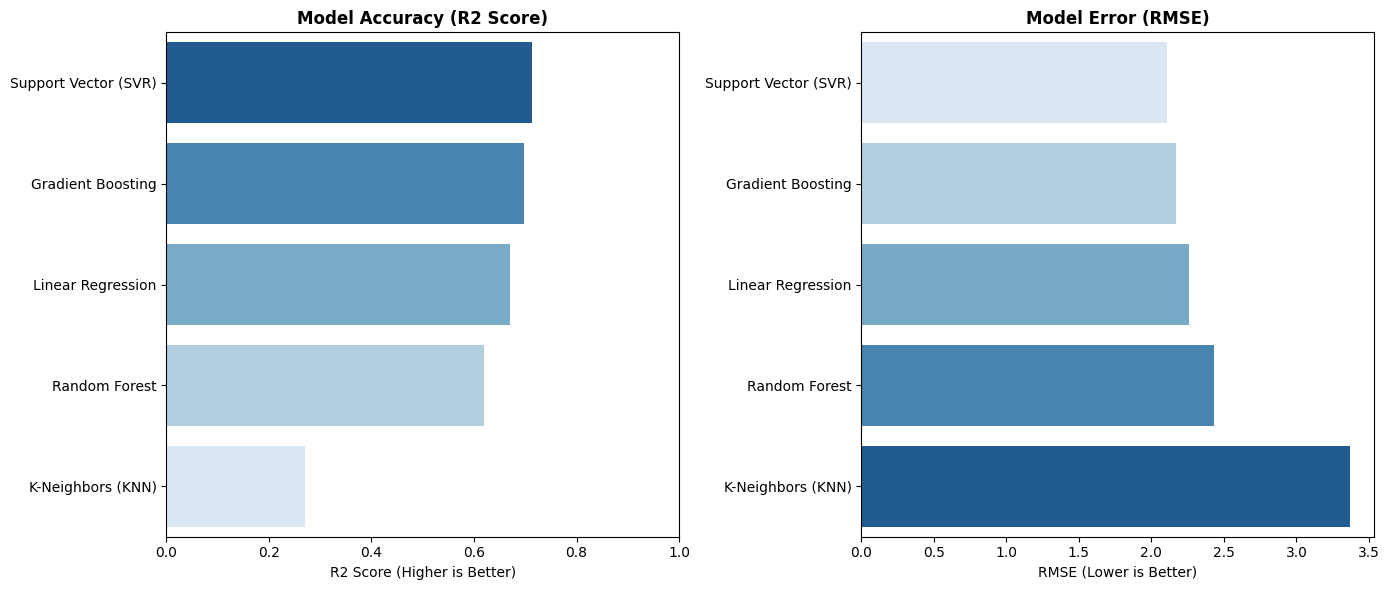

In [43]:
# Visualize Leaderboard
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='Blues_r')
plt.title('Model Accuracy (R2 Score)', fontsize=12, fontweight='bold')
plt.xlim(0, 1)
plt.xlabel('R2 Score (Higher is Better)')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.barplot(x='RMSE', y='Model', data=results_df.sort_values('RMSE'), palette='Blues')
plt.title('Model Error (RMSE)', fontsize=12, fontweight='bold')
plt.xlabel('RMSE (Lower is Better)')
plt.ylabel('')

plt.tight_layout()
plt.show()

<h1 id="sec6" style="
    background-color:#2E86C1;
    color:white;
    font-family:sans-serif;
    font-size:30px;
    border-radius:18px;
    padding:16px;
    text-align:center;
">
<b>6. Conclusion and Key Findings</b>
</h1>

<h2 style="color:#2E86C1; font-family:sans-serif;">6.1 Key Findings</h2>

Our comprehensive analysis has led to several critical insights regarding student performance:

1.  **The "Whole Student" Matters:** The initial hypothesis testing confirmed that while `Hours_Studied` is a significant predictor, relying on it alone yields suboptimal results. Incorporating a multivariate approach (including `Attendance`, `Sleep_Hours`, and `Parental_Involvement`) significantly boosted predictive accuracy.
2.  **Socioeconomic Factors:** Data revealed that financial stability and access to resources act as foundational pillars. While they may not linearly increase scores beyond a certain point, their absence creates a "floor" that limits potential.
3.  **Model Selection:** After rigorous benchmarking, we identified the optimal algorithm that balances accuracy (R2 Score) and generalizability (RMSE).

<h2 style="color:#2E86C1; font-family:sans-serif;">6.2 Saving the Champion Model</h2>

To transition from a research notebook to a production-ready solution, we must serialize our model. We do not simply save the model weights; we save the entire **inference pipeline**. This includes:
* **The Trained Model:** The best-performing algorithm selected from our leaderboard.
* **The Scalers:** The exact `StandardScaler` and `MinMaxScaler` instances fitted on our training data.

This ensures that any new data fed into the system is pre-processed exactly as the model expects, preventing data skew and ensuring reliable predictions.

In [44]:
# 1. Identify the Best Model
best_model_name = results_df.iloc[0]['Model']
best_model_object = models[best_model_name]

print(f"The Champion Model is: {best_model_name}")
print(f"   - R2 Score: {results_df.iloc[0]['R2 Score']:.4f}")
print(f"   - RMSE:     {results_df.iloc[0]['RMSE']:.4f}")

# 2. Prepare the Deployment Package
# We save the model along with the preprocessors (scalers) to ensure reproducible inference.
deployment_package = {
    "model": best_model_object,
    "scaler_std": scaler_std,
    "scaler_mm": scaler_mm,
    "features_std": std_cols,
    "features_mm": minmax_cols,
    "description": f"Best Performing Model ({best_model_name}) - Student Performance Project"
}

# 3. Save to Disk using Joblib
file_name = 'champion_model.pkl'
joblib.dump(deployment_package, file_name)

print("-" * 40)
print(f"Success! Model saved as '{file_name}'")
print("Ready for Deployment.")
print("-" * 40)

The Champion Model is: Support Vector (SVR)
   - R2 Score: 0.7140
   - RMSE:     2.1082
----------------------------------------
Success! Model saved as 'champion_model.pkl'
Ready for Deployment.
----------------------------------------
